# TikTok Engagement

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
processed_dir = '../data/processed/'

videos_df = pd.read_json(processed_dir + 'videos-translated.json', convert_dates=['createTime'])
videos_df['createDate'] = videos_df['createTime'].dt.strftime('%Y-%m-%d')
videos_df['videoId'] = pd.json_normalize(videos_df['video'])['id']
# Calculate ratios
videos_df['shareCountRatio'] = videos_df['shareCount'] / videos_df['playCount']
videos_df['commentCountRatio'] = videos_df['commentCount'] / videos_df['playCount']
videos_df['diggCountRatio'] = videos_df['diggCount'] / videos_df['playCount']


pd.set_option('display.max_colwidth', None)
videos_df['createTime'] = pd.to_datetime(videos_df['createTime'])
create_time_x = videos_df['createTime']
os.makedirs(processed_dir + 'images', exist_ok = True)

How often was Meloni Posting?

## Election Dates
- 25 September 2022 - election
- 21 July 2022 - parliament dissolved after the fall of the Draghi government President Sergio Mattarella

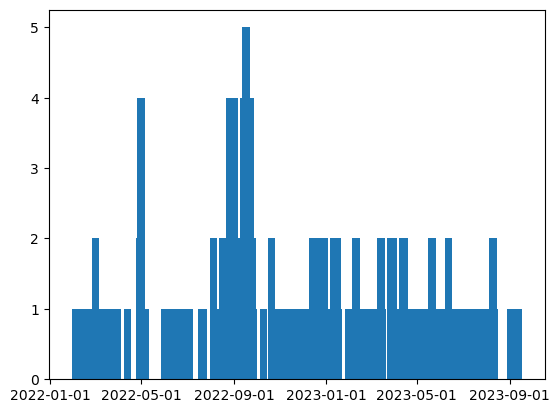

In [8]:
create_time_df = videos_df['createTime'].groupby(videos_df['createTime'].dt.floor('d')).size().reset_index(name='count')
create_time_df = create_time_df.sort_values('count', ascending=False)
x = create_time_df['createTime']
y = create_time_df['count']
ax = plt.subplot(111)
ax.bar(x, y, width=10)
ax.set_xticks(ax.get_xticks()[::2])
ax.xaxis_date()
plt.savefig('../data/processed/images/posts-over-time.png')
plt.show()

## Plays

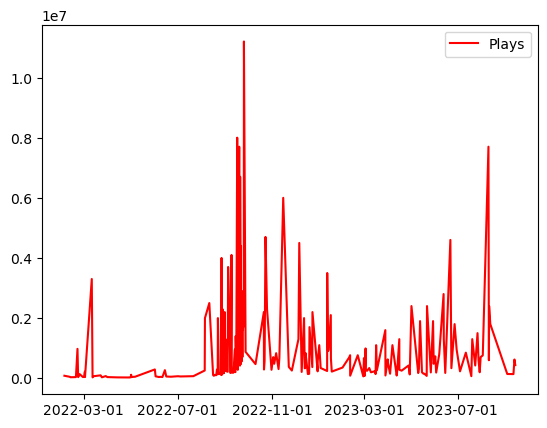

In [70]:
play_count_y = videos_df['playCount']
# this must be an integer out of bounds

ax = plt.subplot(111)
ax.plot(create_time_x, play_count_y, label = "Plays", color='red')
plt.legend()
ax.set_xticks(ax.get_xticks()[::2])
plt.savefig('../data/processed/images/plays.png')
plt.show()

### Most played

In [438]:
videos_df = videos_df.sort_values(by='playCount', ascending=False, na_position='first')
videos_df[['playCountFormatted', 'desc_en', 'createDate']].head(10).style.hide(axis='index')

playCountFormatted,desc_en,createDate
"11,200,000",September 25: I've said it all.,2022-09-25
"8,000,000",Let's clarify (once again) our position regarding the law on abortion. Enough lies!,2022-09-16
"7,700,000",Supporting the most vulnerable and giving a prospect of work and well-being to everyone else: we will leave no one behind. Here's what we want to do with #citizenshipincome. Listen.,2022-09-19
"7,700,000","The new rules on citizenship income are starting to come into force in recent days. It is good to clarify this topic, especially after the controversy and the many falsehoods that have been told. The Government does not intend to retrace its steps: our great objective is to move from citizenship income to employment income, the one obtained thanks to work. #gliappuntidigiorgia",2023-08-09
"6,700,000",September 25th is approaching. You are ready? #VoteFdI,2022-09-20
"6,000,000","Today and tomorrow in Bali to participate in the #G20Indonesia and important bilateral meetings. Faced with the challenges of our time, we need to dialogue and work together to find solutions to global crises.",2022-11-15
"5,000,000",I have a complaint to make. Listen carefully…,2022-09-18
"4,700,000",It begins. With a lot of emotion but also with the awareness of the difficult challenges that await us. Now it's our turn: we are ready 🇮🇹,2022-10-23
"4,600,000",Good luck to all graduates!,2023-06-21
"4,500,000","Work can take you anywhere, while citizenship income leaves you where you are. And we have chosen to believe in Italy and Italians. #Giorgia'snotes",2022-12-06


## Least Played

In [439]:
df = videos_df.sort_values(by=['playCount'], ascending=True)
df['createDate'] = df['createTime'].dt.strftime('%Y-%m-%d')
df[['playCountFormatted', 'desc_en',  'createDate']].head(10).style.hide(axis='index') 

playCountFormatted,desc_en,createDate
"25,100","My opening speech has just finished at the Fratelli d'Italia programmatic conference, which you can review on my Facebook page",2022-04-29
"28,200","This is a #government that cannot decide anything on an international, national and economic level. A majority that just gets by. So if #Draghi went home, it would be good news.",2022-04-13
"28,700","Some characters try in every way, every day, to paint a version of me that is very different from reality. Too bad for them, lies can easily be proven wrong.",2022-03-12
"29,200",The only reason why we want to get to the top is because from there we know we can look further. #EnergyToLiberate,2022-04-29
"31,100","Always on the same side, that of the #Italians.",2022-03-24
"31,100",Freedom? In the last two years it has been sacrificed due to the incompetence of a certain political class. It's time to say enough. #energytoliberate,2022-04-30
"33,000",Let it be clear to everyone: we will never form a government with the PD and with the left. Our values ​​are and will remain those of the right and center-right.,2022-02-11
"34,300","Europe presented itself at the rendezvous of history without a defense, without a foreign policy, incapable of carrying out any diplomatic action. American interference is a European choice and it is a wrong choice.",2022-04-30
"35,700","While some journalists have used their time to pass off #fratelliditalia as a party of unpresentable people, we have built a serious, credible, modern, respected #right that has not allowed itself to be pushed into a corner. Let them continue telling fairy tales, in the meantime we'll make history.",2022-05-01
"36,300","Unlike many others, we have never defended privileges. We are defending #work and entrepreneurs who had trusted the State and now have to fight tooth and nail to save their business. #fratelliditalia #cameradeideputati",2022-02-21


## Engagement

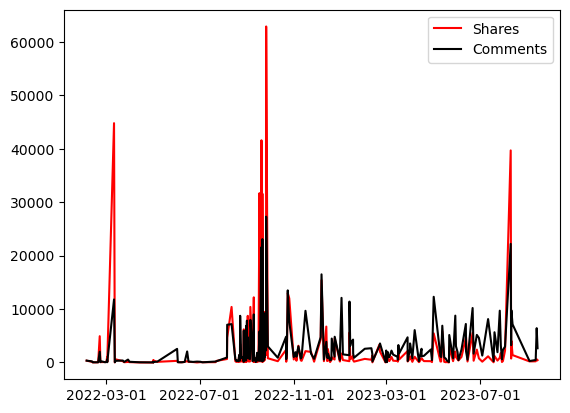

In [69]:
ax = plt.subplot(111)
ax.plot(create_time_x, videos_df['shareCount'], label = "Shares", color='red')
ax.plot(create_time_x, videos_df['commentCount'], label = "Comments", color='black')
plt.legend()
ax.set_xticks(ax.get_xticks()[::2])
plt.savefig('../data/processed/images/engagement.png')
plt.show()

The TikTok algorithm is not entirely based on the users’ social network activities or the accounts that users have followed (Medina Serrano et al., 2020). If a video is “viewed,” it doesn’t mean that a person actively engages with this video because the second a video is played on the “for you” page, the platform count it as a “view.” Therefore, we assume that dividing the number of likes/comments/shares by the number of views will be a more accurate way to roughly estimate how successful and engaging a video is on TikTok.


## Most Shared

In [448]:
videos_df['shareCountFormatted'] = videos_df['shareCount'].map('{:,}'.format)
df = videos_df.sort_values(by=['shareCount'], ascending=False)
df['createDate'] = df['createTime'].dt.strftime('%Y-%m-%d')
df[['shareCountFormatted', 'desc_en', 'createDate']].head(10).style.hide(axis='index') 

shareCountFormatted,desc_en,createDate
"62,900",September 25: I've said it all.,2022-09-25
"44,800","In the midst of an international crisis and in full economic #emergency, what will the ""#government of the best"" take care of? Extend the #greenpass. A senseless madness and without any scientific evidence. #Brothers of Italy",2022-03-11
"41,600",Supporting the most vulnerable and giving a prospect of work and well-being to everyone else: we will leave no one behind. Here's what we want to do with #citizenshipincome. Listen.,2022-09-19
"39,700","The new rules on citizenship income are starting to come into force in recent days. It is good to clarify this topic, especially after the controversy and the many falsehoods that have been told. The Government does not intend to retrace its steps: our great objective is to move from citizenship income to employment income, the one obtained thanks to work. #gliappuntidigiorgia",2023-08-09
"31,700",Let's clarify (once again) our position regarding the law on abortion. Enough lies!,2022-09-16
"31,600",September 25th is approaching. You are ready? #VoteFdI,2022-09-20
"15,400","Work can take you anywhere, while citizenship income leaves you where you are. And we have chosen to believe in Italy and Italians. #Giorgia'snotes",2022-12-06
"13,000",It begins. With a lot of emotion but also with the awareness of the difficult challenges that await us. Now it's our turn: we are ready 🇮🇹,2022-10-23
"12,200","Enrico, sleep peacefully.",2022-09-09
"12,000","At the end of this adventure, only one thing will interest me: knowing that we have done everything we could to give Italians a better nation. Rest assured that we will not give up, we will not retreat, and we will not betray.",2022-10-25


## Highest Share Count Ratio

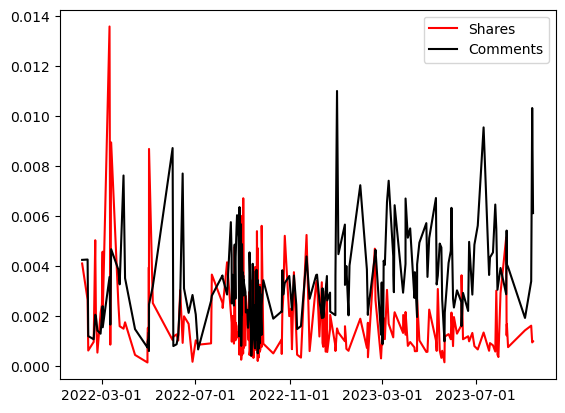

In [68]:
ax = plt.subplot(111)
ax.plot(create_time_x, videos_df['shareCountRatio'], label = "Shares", color='red')
ax.plot(create_time_x, videos_df['commentCountRatio'], label = "Comments", color='black')
plt.legend()
ax.set_xticks(ax.get_xticks()[::2])
plt.savefig('../data/processed/images/engagement-ratio.png')
plt.show()

In [5]:
df = videos_df.sort_values(by=['shareCountRatio'], ascending=False)
df['createDate'] = df['createTime'].dt.strftime('%Y-%m-%d')
df[['shareCountRatio', 'desc_en', 'createDate']].head(10).style.hide(axis='index') 

shareCountRatio,desc_en,createDate
0.013576,"In the midst of an international crisis and in full economic #emergency, what will the ""#government of the best"" take care of? Extend the #greenpass. A senseless madness and without any scientific evidence. #Brothers of Italy",2022-03-11
0.008946,"In the #Government documents it is clearly written that the cadastre reform will affect the taxation of the house. Mario #Draghi's reassurances, therefore, are totally unfounded. Yet another social massacre that will worsen an economic situation that is already at its limits for families and businesses. Surreal that the Prime Minister claims the opposite.",2022-03-13
0.008686,You will find us ready and with our heads held high. We will challenge you and beat you with a smile and the pride of our ideas.,2022-05-01
0.006717,"A just state cannot put those who can work and those who are unable to do so on the same level of welfare. A just state cannot tell our children to stay at home because there is no need for them. We desperately need the young people of our nation, we need to believe in them and make them believe in themselves. We will leave no one behind.",2022-09-01
0.006014,"Ready to protect the home of Italians. The house is the primary asset around which people build their future. Fratelli d'Italia will approve a law that will say one simple thing: the first house cannot be seized, except obviously for non-payment of any mortgage loan weighing on it and in the event of prolonged arrears towards the condominium. And we will also approve another law which provides for the immediate eviction of illegal occupations of other people's homes",2022-08-29
0.005616,September 25: I've said it all.,2022-09-25
0.005403,Supporting the most vulnerable and giving a prospect of work and well-being to everyone else: we will leave no one behind. Here's what we want to do with #citizenshipincome. Listen.,2022-09-19
0.005251,#Maneuver2023,2022-11-22
0.005217,"At the end of this adventure, only one thing will interest me: knowing that we have done everything we could to give Italians a better nation. Rest assured that we will not give up, we will not retreat, and we will not betray.",2022-10-25
0.005156,"The new rules on citizenship income are starting to come into force in recent days. It is good to clarify this topic, especially after the controversy and the many falsehoods that have been told. The Government does not intend to retrace its steps: our great objective is to move from citizenship income to employment income, the one obtained thanks to work. #gliappuntidigiorgia",2023-08-09


## Most Commented On

In [392]:
videos_df['commentCountFormatted'] = videos_df['commentCount'].map('{:,}'.format)
df = videos_df.sort_values(by=['commentCount'], ascending=False)
df['createDate'] = df['createTime'].dt.strftime('%Y-%m-%d')
df[['commentCountFormatted', 'createDate', 'desc_en']].head(10).style.hide(axis='index') 

commentCountFormatted,createDate,desc_en
"27,300",2022-09-25,September 25: I've said it all.
"23,100",2022-09-20,September 25th is approaching. You are ready? #VoteFdI
"22,200",2023-08-09,"The new rules on citizenship income are starting to come into force in recent days. It is good to clarify this topic, especially after the controversy and the many falsehoods that have been told. The Government does not intend to retrace its steps: our great objective is to move from citizenship income to employment income, the one obtained thanks to work. #gliappuntidigiorgia"
"21,600",2022-09-19,Supporting the most vulnerable and giving a prospect of work and well-being to everyone else: we will leave no one behind. Here's what we want to do with #citizenshipincome. Listen.
"19,300",2022-09-18,I have a complaint to make. Listen carefully…
"16,500",2022-12-06,"Work can take you anywhere, while citizenship income leaves you where you are. And we have chosen to believe in Italy and Italians. #Giorgia'snotes"
"13,500",2022-10-23,It begins. With a lot of emotion but also with the awareness of the difficult challenges that await us. Now it's our turn: we are ready 🇮🇹
"12,300",2023-05-01,May 1st: the Government celebrates with facts. Even today at work to improve the conditions of workers.
"12,100",2023-01-01,"To you, to your families, happy 2023."
"11,800",2022-03-11,"In the midst of an international crisis and in full economic #emergency, what will the ""#government of the best"" take care of? Extend the #greenpass. A senseless madness and without any scientific evidence. #Brothers of Italy"


## Most Liked

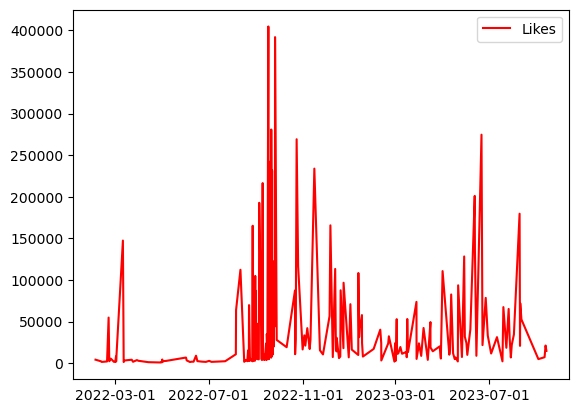

In [67]:
digg_count_y = videos_df['diggCount']

ax = plt.subplot(111)
ax.plot(create_time_x, digg_count_y, label = "Likes", color='red')
plt.legend()
ax.set_xticks(ax.get_xticks()[::2])
plt.savefig('../data/processed/images/likes.png')
plt.show()

In [457]:
videos_df['diggCountFormatted'] = videos_df['diggCount'].map('{:,}'.format)
df = videos_df.sort_values(by=['diggCount'], ascending=False)
df['createDate'] = df['createTime'].dt.strftime('%Y-%m-%d')
df[['diggCountFormatted', 'desc_en', 'createDate']].head(20).style.hide(axis='index') 

diggCountFormatted,desc_en,createDate
"404,800",Let's clarify (once again) our position regarding the law on abortion. Enough lies!,2022-09-16
"392,000",September 25: I've said it all.,2022-09-25
"280,900",September 25th is approaching. You are ready? #VoteFdI,2022-09-20
"274,700",Good luck to all graduates!,2023-06-21
"269,200",It begins. With a lot of emotion but also with the awareness of the difficult challenges that await us. Now it's our turn: we are ready 🇮🇹,2022-10-23
"242,400",Supporting the most vulnerable and giving a prospect of work and well-being to everyone else: we will leave no one behind. Here's what we want to do with #citizenshipincome. Listen.,2022-09-19
"233,900","Today and tomorrow in Bali to participate in the #G20Indonesia and important bilateral meetings. Faced with the challenges of our time, we need to dialogue and work together to find solutions to global crises.",2022-11-15
"231,700","Bologna, handmade tortellini lesson by Patrizia and Lisa: Italian excellence and local pride. What do you think, did I get away with it? I'll get better.",2022-09-21
"216,500","Enrico, sleep peacefully.",2022-09-09
"201,100","To God, Silvio.",2023-06-12


## Like Count Ratio

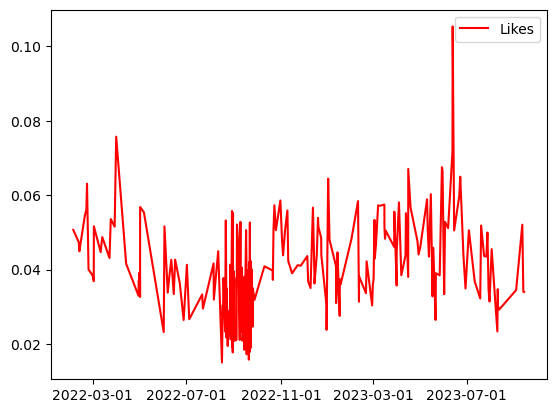

In [66]:
ax = plt.subplot(111)
ax.plot(create_time_x, videos_df['diggCountRatio'], label = "Likes", color='red')
plt.legend()
ax.set_xticks(ax.get_xticks()[::2])
plt.savefig('../data/processed/images/likes-ratio.png')
plt.show()

In [459]:
df = videos_df.sort_values(by=['diggCountRatio'], ascending=False)
df['createDate'] = df['createTime'].dt.strftime('%Y-%m-%d')
df[['diggCountRatio', 'desc_en', 'createDate']].head(20).style.hide(axis='index') 

diggCountRatio,desc_en,createDate
0.105385,"The attacks never unsettled him. To those who, even today, are pouring hatred towards him, he would have responded as usual with a smile and a joke. We will remember him like this.",2023-06-12
0.075737,"Whether it is inability or lack of #political will, #Lamorgese has failed at everything. What are you waiting for to resign?",2022-03-31
0.071821,"To God, Silvio.",2023-06-12
0.067526,"The center-right wins these administrative elections and confirms its consensus among Italians, its roots and its strength. My best wishes to all the mayors for good work.",2023-05-29
0.067045,"An extremely emotional meeting with the children of the Italian “Galileo Galilei” school in Addis Ababa, Ethiopia. Thank you for your love. Always continue to believe in yourself and no one will ever be able to stop you.",2023-04-15
0.066334,"Believing in what we are is the most powerful fuel we can put in the nation's engine. It is the fuel we need to chart new routes and become protagonists again in Italy and in the world. Extract from the video message at the conference “Nazione e Patria. Rediscovered ideas”, which you can find complete on my Facebook-Twitter profiles.",2023-05-30
0.064970,Defense of religious freedom: Italy can and must set an example.,2023-06-22
0.064455,"To you, to your families, happy 2023.",2023-01-01
0.063058,"Unlike many others, we have never defended privileges. We are defending #work and entrepreneurs who had trusted the State and now have to fight tooth and nail to save their business. #fratelliditalia #cameradeideputati",2022-02-21
0.060266,The National Gathering of the #Alpini is one of the most extraordinary representations of what love of country is. Thanks for the welcome.,2023-05-15


## Warn Info


In [18]:
warning_df = videos_df[videos_df['warnInfo'].notnull()].head()
warning_df[['warnInfo','desc_en','createTime']].style.hide(axis='index')

warnInfo,desc_en,createTime
Learn more about COVID-19 vaccines,"The #G7 Summit in #Hiroshima, Japan was very intense. With the other Heads of State and Government I spent two days marked by many discussion sessions and bilateral meetings, which allowed us to address many crucial issues of our time. A very significant moment was the laying of a wreath at the Hiroshima Peace Memorial, where I paid my honors and due respect to the victims of the atomic bomb in World War II. I thank Japanese Prime Minister Fumio Kishida for the determination and seriousness with which he organized this important Summit and for managing a presidency in a difficult context. Next year it will be Italy's turn to host the G7, and we will do so in Puglia, a region symbolizing the meeting between West and East. It is a great responsibility for Italy, but we will be up to the task. We continue to work together, in the unity of all members, demonstrating that the G7 is strong and determined, ready to face present and future challenges, for international peace and security and for our Nations.",2023-05-21 10:11:33
Learn more about COVID-19 vaccines,"The mission to the United Kingdom was a success. The Memorandum of Understanding, which we signed with Prime Minister Rishi Sunak, represents a great achievement and crowns the excellent state of relations between our Nations. Italy and the United Kingdom are ready to actively collaborate to achieve common objectives.",2023-04-29 07:37:37
Learn the facts about COVID-19,"On Covid, the restrictive model adopted in the past did not work, as we are also seeing in China. My idea is that we need to work on empowering citizens and on prevention, rather than on the deprivation of freedoms. And I intend to continue like this in the future too.",2022-12-30 09:52:49
Learn more about COVID-19 vaccines,"At the Altare della Patria, to lay a laurel wreath on the Tomb of the Unknown Soldier. We pay homage to all those who sacrificed their lives for the nation. A past to be honored and passed on to new generations, day after day, to build Italy's future together.",2022-10-31 08:35:47
